In [1]:
import numpy as np

prob_infect = 0.02
students = []
NUM_DAYS_SIM = 45
num_replications = 1000

class student:
    def __init__(self):
        self.curr_infected = False
        self.prev_infected = False
        self.is_infectious = False
        self.num_days_infectious = 0
    
    def get_infected(self):
        # Can be infected only if not infected in the past
        if self.prev_infected == False:
            self.curr_infected = True
            self.is_infectious = True
            self.num_days_infectious = 3

    def fully_recover(self):
        self.curr_infected = False
        self.is_infectious = False
        self.prev_infected = True
    
    def partial_recover(self):
        if self.curr_infected == True:
            self.num_days_infectious -= 1
            if self.num_days_infectious == 0:
                self.fully_recover()
            else :
                return

# Stats collected at end of each day
def update_daily_new_infected():
    daily_new_infected.append(sum([1 if x.curr_infected == True and x.num_days_infectious == 3 else 0 for x in students]))

def update_daily_total_infected():
    daily_infected.append(sum([1 if x.curr_infected == True else 0 for x in students]))
    
def update_daily_recoveries():
    daily_recovered.append(sum([1 if (x.prev_infected == True ) else 0 for x in students]))

def update_daily_susceptible():
    daily_susceptible.append(sum([1 if (x.prev_infected == False and x.curr_infected == False) else 0 for x in students]))
    
def simulate_day():
    # Assumption - All 21 students attend school everyday
    # Every student interacts with every other student
    # Cannot catch infection after recovery - [Change student.prev_infected == True block if that's not the case]
    
    curr_infected = daily_infected[-1]
    student_ctr = 0 
    for student in students:
        student_ctr+=1
#         print('With Student {}'.format)
        if student.curr_infected == True:
            student.partial_recover()
            
        elif student.prev_infected == True:
            continue
            
        else:
#             print('~~~~~~ Student {} is currently uninfected ~~~~~~ '.format(student_ctr))
            for i in range(curr_infected): # Bernoulli trial for getting infected from any of the affected students
                trial_prob = np.random.random(1)
#                 print('~~ Intreaction with student {} gave trial prob {}'.format(i, trial_prob))
                if trial_prob < prob_infect:
                    student.get_infected()
                 
    
    update_daily_new_infected()
    update_daily_total_infected()
    update_daily_recoveries()
    update_daily_susceptible()


all_runs_cuml_daily_infected = []
all_runs_daily_recovered = []
all_runs_daily_susceptible = []
all_runs_daily_infected = []

for i in range(num_replications):
    daily_infected = []
    daily_recovered = []
    daily_susceptible = []
    daily_new_infected = []
    
    # Set seed
    np.random.seed(i*10)
    
    # LOOP STARTS HERE
    students = [student() for i in range(21)]
    
    
    # Day 0 - Tommy infected
    curr_day = 0
    students[0].get_infected()
    update_daily_new_infected()
    update_daily_total_infected()
    update_daily_recoveries()
    update_daily_susceptible()

    for i in range(1, NUM_DAYS_SIM):
#         print('~~~~~~~~ Day : {} ~~~~~~~~ '.format(i))
        simulate_day()
    
    all_runs_daily_infected.append(daily_infected)
    all_runs_cuml_daily_infected.append(np.cumsum(daily_infected))
    all_runs_daily_recovered.append(daily_recovered)
    all_runs_daily_susceptible.append(daily_susceptible)

In [2]:
avg_daily_cuml_infected = np.mean(all_runs_cuml_daily_infected, axis = 0)
avg_daily_infected = np.mean(all_runs_daily_infected, axis = 0)
avg_daily_recovery = np.mean(all_runs_daily_recovered, axis = 0)
avg_daily_susceptible = np.mean(all_runs_daily_susceptible, axis = 0)

Text(0.5, 1.0, 'Disease Propogation')

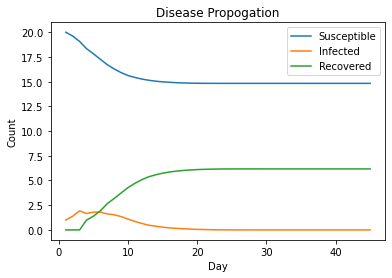

In [3]:
from matplotlib import pyplot as plt
import numpy as np


plt.plot(range(1,len(avg_daily_susceptible)+1), avg_daily_susceptible)
plt.plot(range(1,len(avg_daily_infected)+1), avg_daily_infected)
plt.plot(range(1,len(avg_daily_recovery)+1), avg_daily_recovery)

plt.legend(['Susceptible', 'Infected', 'Recovered'], loc=1)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Disease Propogation')

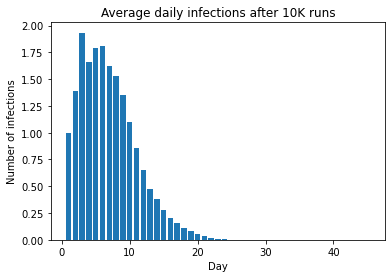

In [8]:
plt.bar(range(1,len(avg_daily_susceptible)+1),avg_daily_infected)
plt.title('Average daily infections after 10K runs')
plt.xlabel('Day')
plt.ylabel('Number of infections')
plt.show()

In [5]:
# Distribution of number of kids tommy infects on Day 1 - Binomial
# Expected number of kids tomy infects on day 1 = 0.8 (cell below)
# Expected number of kids infected on day 2 = 2.2 (2 cells below)

In [6]:
avg_daily_infected

array([1.000e+00, 1.390e+00, 1.933e+00, 1.662e+00, 1.794e+00, 1.805e+00,
       1.622e+00, 1.532e+00, 1.348e+00, 1.098e+00, 8.590e-01, 6.540e-01,
       4.770e-01, 3.770e-01, 2.770e-01, 2.040e-01, 1.530e-01, 1.120e-01,
       8.600e-02, 5.500e-02, 3.900e-02, 2.100e-02, 1.100e-02, 4.000e-03,
       2.000e-03, 1.000e-03, 1.000e-03, 1.000e-03, 1.000e-03, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

In [7]:
avg_daily_cuml_infected

array([ 1.    ,  2.4058,  4.3364,  5.9773,  7.7394,  9.5207, 11.0949,
       12.5525, 13.8168, 14.8429, 15.6595, 16.2727, 16.7275, 17.0578,
       17.2923, 17.4545, 17.5667, 17.6428, 17.6973, 17.7317, 17.7552,
       17.7681, 17.7758, 17.7801, 17.7827, 17.7843, 17.785 , 17.7853,
       17.7855, 17.7856, 17.7857, 17.7858, 17.7858, 17.7858, 17.7858,
       17.7858, 17.7858, 17.7858, 17.7858, 17.7858, 17.7858, 17.7858,
       17.7858, 17.7858, 17.7858])